# Biblioteca

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import statistics
drive.mount('/content/drive')
sns.set_style("whitegrid")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  <a name="indice">  Índice </a>

* [1.0 Objetivo.](#secao_1.0)
* [2.0 Importação dos dados.](#secao_2.0)
* [3.0 Perfil das pessoas.](#secao_3.0)
    * [3.1 O Idade .](#secao_3.1)
    * [3.2 O Sexo/raça .](#secao_3.2)
    * [3.3 O Ano de conclusão.](#secao_3.3)
    * [3.4 O Renda.](#secao_3.4)
    * [3.5 O Escolaridade dos pais.](#secao_3.5)
    * [3.6 Internet.](#secao_3.6)
    * [3.7 Sistema admistrativo do colegio.](#secao_3.6)


* [4.0 Análises.](#secao_4.0)
  * [4.1 O desepenho dos homens e mulhueres mudão por cor/raça? .](#secao_4.1)
  * [4.2 Essa difenreça entre as notas dos homens e mulheres e causada por qual prova ?.](#secao_3.2)
  * [4.3 Como esta distribuido a porcentagem de alunos de raças se sexos diferentes ?.](#secao_4.3)
  * [4.4 O tipo de escola que a pessoa estudo afeta o seu desempenho ?.](#secao_4.4)
  * [4.5  Quanto maior a renda, maior o desempenho dos alunos.](#secao_4.5)   
  * [4.6 Escolaridade dos pais interfere na nota dos alunos?.](#secao_4.6)
  * [4.7  O acesso a internet e ao um computador influência nos estudos ?.](#secao_4.7)
  * [5.0  Conclusão.](#secao_5.0)





# <a name="secao_1.0"> 1. Objetivo </a>.
 
* Estas análises que serão vistas tem como objetivo entender o impacto dos fatores sociais e econômicos no desempenho do enem.
* O enfoque das análises será feito em nas vertentes:
 
 * Sexo.
 * Raça.
 * Acesso a internet.
 * Influência dos pais.
 
* Os plots que  foram escolhidos para ser apresentados no relatório terá uma seção só para ele.
 
* As comparações que são feitas, serão realizadas através da medida de média e erro padrão.
 



# <a name="secao_2.0"> 2. Importação dos dados </a>.

* Será importado o conjunto de dados que foi processado pelo notebook que foi denominado de **Tratamento dos dados**

In [2]:
# importando os dados
df = pd.read_csv('/content/drive/My Drive/desafio semantix/dados1.csv',sep=';',encoding='iso-8859-1')

In [3]:
df.head()  # Olhando a estrutura do dataset

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Raça,Escolaridade do pai,Escolaridade da mãe,Q026,Nota media,Sexo,Renda
0,25.0,1,4,NaN,483.8,503.6,537.3,392.0,460.0,Branco,3,5,Comp. Internet,475.34,Fêmea,2245
1,22.0,1,4,NaN,513.6,575.5,570.7,677.0,860.0,Branco,5,5,Comp. Internet,639.36,Fêmea,3493
2,37.0,1,13,NaN,563.7,644.9,564.2,675.3,800.0,Preto,2,2,Comp. Internet,649.62,Macho,2245
3,22.0,1,5,NaN,484.6,488.4,507.2,594.7,600.0,Preto,5,2,N.,534.98,Fêmea,499
4,17.0,2,0,NaN,543.9,548.1,502.5,480.7,400.0,Branco,5,5,Comp. Internet,495.04,Macho,2744


# <a name="secao_3.0"> 3. Perfil das pessoas </a>.
 
* Será visto as variáveis que indicam as características pessoais para montar o perfil das pessoas que foram fazer o Enem.
 
### <a name="secao_3.1"> 3.1  Idade  </a>.


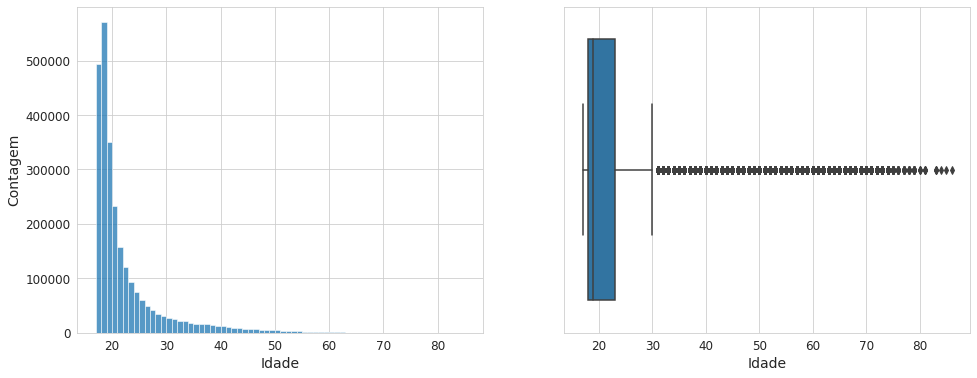

In [4]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.histplot(x = 'NU_IDADE', bins =  np.arange(np.min(df['NU_IDADE']),np.max(df['NU_IDADE']),1),data = df, palette = 'crest')

plt.xlabel('Idade', fontsize = 14)

plt.ylabel('Contagem', fontsize = 14)
plt.subplot(1,2,2)
sns.boxplot(x = 'NU_IDADE',data = df)
plt.xlabel('Idade', fontsize = 14)
plt.show()

In [5]:
print('olhando algumas medidas estatisticas')
print('Quartil 0.75',np.quantile(df['NU_IDADE'],0.75))
print('As pessoas que não foram treinar:',statistics.mode(df['NU_IDADE']))

olhando algumas medidas estatisticas
Quartil 0.75 23.0
As pessoas que não foram treinar: 18.0


### <a name="secao_3.2"> 3.2  Sexo/Raça  </a>.

In [6]:
# Sexo
df['Sexo'].value_counts()/df.shape[0]

Fêmea    0.58598
Macho    0.41402
Name: Sexo, dtype: float64

In [7]:
# Raça
df['Raça'].value_counts()/df.shape[0]

Preto     0.621006
Branco    0.378994
Name: Raça, dtype: float64

### <a name="secao_3.3"> 3.3  Ano de conclusão  </a>.

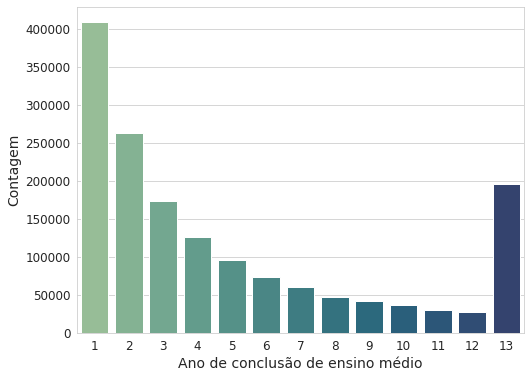

In [8]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.countplot(x= 'TP_ANO_CONCLUIU', data= df[df['TP_ANO_CONCLUIU'] > 0],palette = 'crest')
plt.xlabel('Ano de conclusão de ensino médio', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.show()

In [9]:
print('olhando algumas medidas estatisticas')
print('Quartil 0.75',np.quantile(df['TP_ANO_CONCLUIU'],0.9))

olhando algumas medidas estatisticas
Quartil 0.75 10.0


In [13]:
np.sum((df['TP_ST_CONCLUSAO'] ==2) & (df['TP_ANO_CONCLUIU'] ==0))/df.shape[0] 

0.3748550324451194

In [16]:
np.sum((df['TP_ANO_CONCLUIU'] <=3) & (df['TP_ANO_CONCLUIU'] >0))/df.shape[0]

0.3239230981637443

In [27]:
np.sum((df['TP_ANO_CONCLUIU'] ==1))/df.shape[0]

0.15667656127755533

In [28]:
np.sum((df['TP_ANO_CONCLUIU'] ==2))/df.shape[0]

0.10064276619571387

In [29]:
np.sum((df['TP_ANO_CONCLUIU'] ==3))/df.shape[0]

0.0666037706904751

### <a name="secao_3.4"> 3.4 Renda  </a>.

In [17]:
df['Renda'] = np.round(df['Renda']/1000,1) # so para melhorar apresentação do eixo x no plot

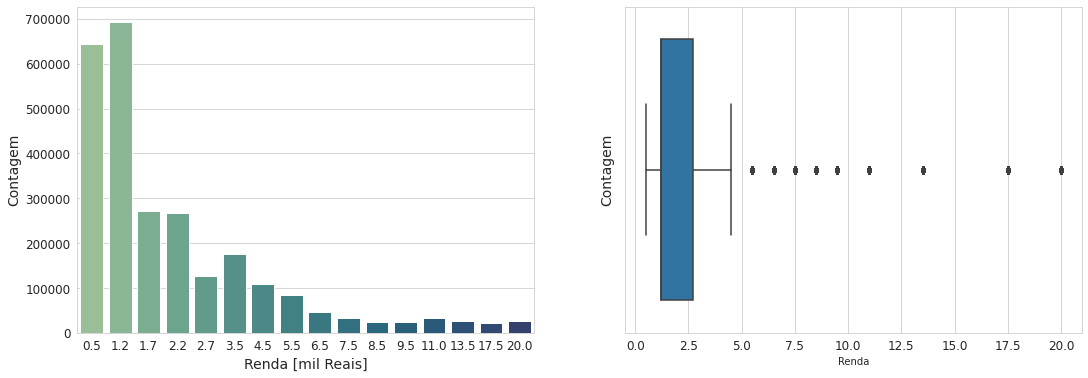

In [18]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.countplot(x= 'Renda', data= df,palette = 'crest')
plt.xlabel('Renda [mil Reais]', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x= 'Renda', data= df)
plt.ylabel('Contagem', fontsize = 14)

plt.show()

* Claramente a renda mais frequente é de 1.2 mil reais.
* 50% das pessoas que foram fazer o enem tem essa renda.
 
* Como já foi mencionado antes, a renda das pessoas de raça preta é menor do que a de branco. Será visto os mesmos plots estratificando por raças


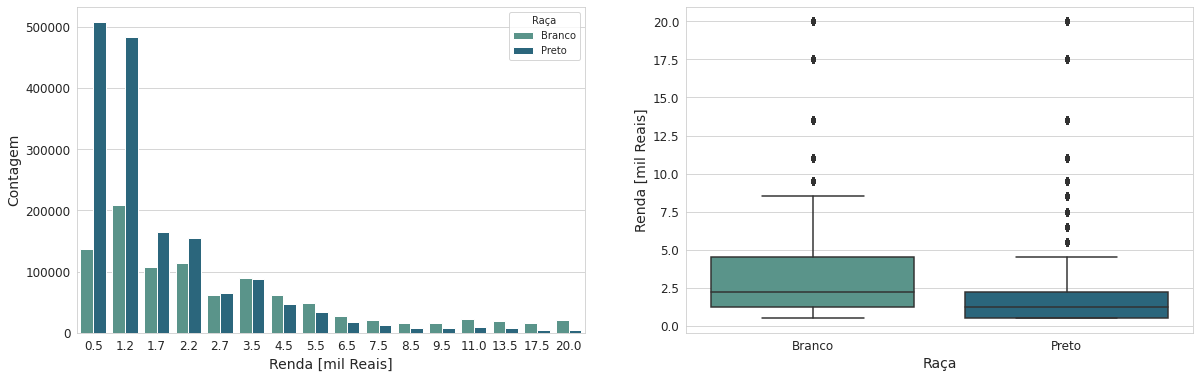

In [19]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.countplot(x= 'Renda', data= df,hue ='Raça',palette = 'crest')
plt.xlabel('Renda [mil Reais]', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x= 'Raça',y ='Renda',data= df,palette = 'crest')
plt.ylabel('Renda [mil Reais]', fontsize = 14)
plt.xlabel('Raça', fontsize = 14)
plt.show()

* Alguns pontos se destacam nesses plot.
 
* Primeiro existem pessoas de raças pretas com rendas menores do que as brancas.
 
* A renda de pessoas brancas começa a ser maior do que as pretas quando a sua renda é de 3.5 mil.
 
* 75 porcento da população de raça preta tem uma renda de até 2.5 mil reais. Onde a maioria dessa porcentagem está sendo concentrada nas pessoas que tem uma renda de 1.2 mil reais.
 
* Um outro ponto que se destaca é que a distribuição de renda de pessoas brancas é mais uniforme do que as de pessoas pretas até o valor de 2.2 mil reais.
 



### <a name="secao_3.5"> 3.5 Escolaridade dos pais  </a>.

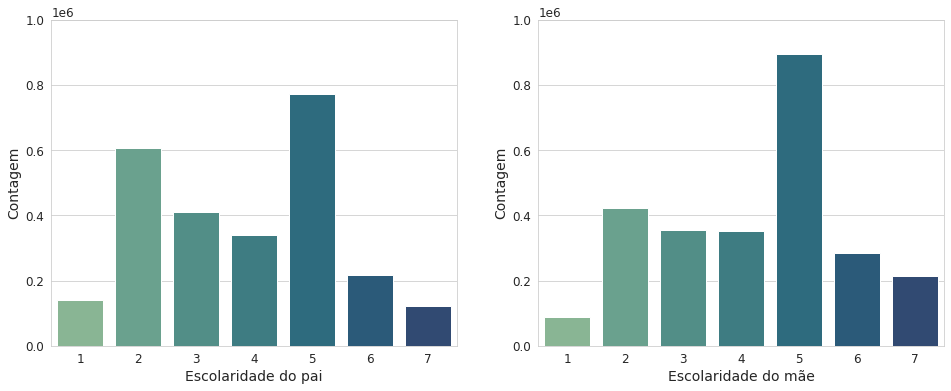

In [20]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.countplot(x= 'Escolaridade do pai' ,data= df,palette = 'crest')
plt.xlabel('Escolaridade do pai', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.ylim(0,1000000)
plt.subplot(1,2,2)
sns.countplot(x= 'Escolaridade da mãe',data= df,palette = 'crest')
plt.ylabel('Contagem', fontsize = 14)
plt.xlabel('Escolaridade do mãe', fontsize = 14)
plt.ylim(0,1000000)
plt.show()

In [24]:
np.sum(df['Escolaridade do pai'] <= 5)/df.shape[0]



0.8700576802123122

In [26]:
np.sum(df['Escolaridade da mãe'] <= 5)/df.shape[0]

0.8087946983294215

* Quando é comparado a contagem entre as escolaridades iguais. A das mães fica maior a partir das pessoas tenha no mínimo um ensino médio .
 
* A escolaridade mais frequente entre os pais são aqueles têm o ensino médio completo.
 
* Em ambos os casos 75% dos dados estão concentrados nos país que tem o ensino médio completo.
 



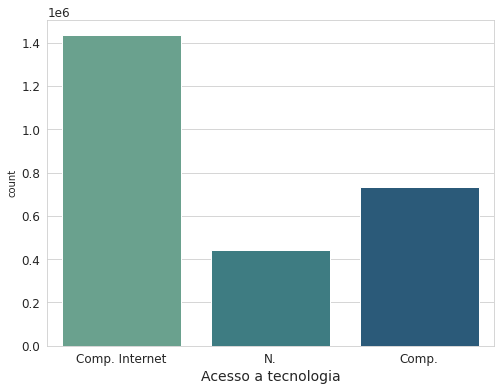

In [21]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Q026', data= df,palette = 'crest')
plt.xlabel('Acesso a tecnologia', fontsize = 14)


plt.show()

* Quanto maior a renda maior é o número de pessoas com acesso a internet e a um computador?
 



Text(0, 0.5, 'Contagem')

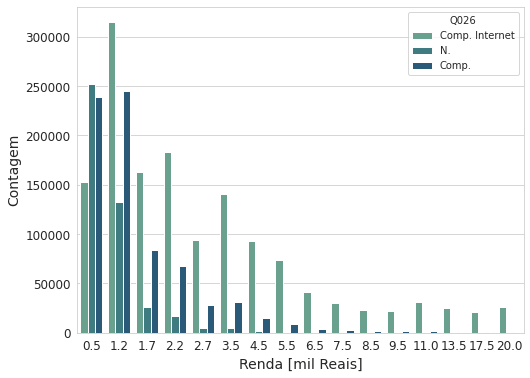

In [41]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Renda' ,data= df,hue = 'Q026',palette = 'crest')

plt.xlabel('Renda [mil Reais]', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)

### <a name="secao_3.6"> 3.6 Sistema admistrativo do colegio  </a>.

Text(0.5, 0, 'Admistração do colégio')

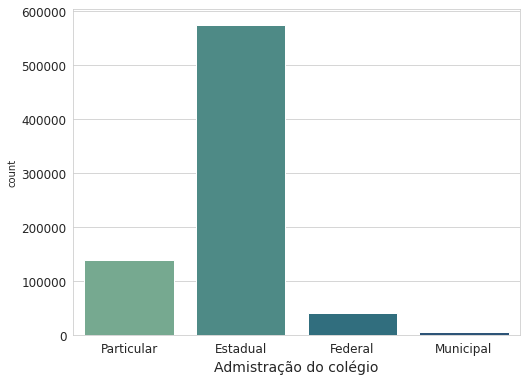

In [15]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.countplot(x= 'TP_DEPENDENCIA_ADM_ESC', data= df,palette = 'crest')
plt.xlabel('Admistração do colégio', fontsize = 14)

* Usando como base os dados que não estão como faltantes. A maioria dos estudantes provém dos colégios estaduais.
 
* Foi visto que a maioria dos alunos com renda baixa são da raça preta, logo eles estão concentrados em colégios públicos ?
 



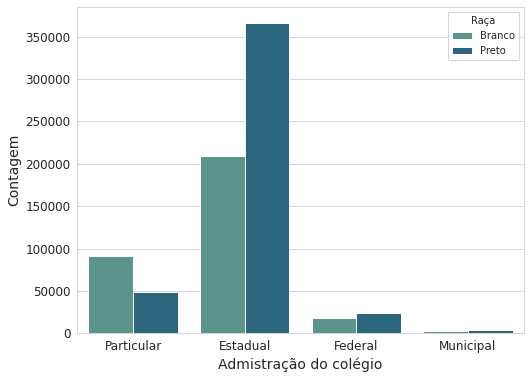

In [16]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.countplot(x= 'TP_DEPENDENCIA_ADM_ESC' ,data= df,hue = 'Raça',palette = 'crest')

plt.xlabel('Admistração do colégio', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)

plt.show()

* O número de alunos brancos só é maior nos colégios particulares.

### <a name="secao_3.7"> 3.7 Perfil das pessoas que foram fazer o enem  </a>.
 
* Em relação ao banco de dados 55% dos participantes são do sexo femenino e 62 porcento é da raça preta. Em relação a idade dos candidatos é de 75% deles a sua idade vai de 17 a 23 anos e os outros 25% vai de 24 a 85 anos. Onde a maioria destes alunos tem uma renda de até 1.2 mil reais e são alunos da escola pública.
* Um outro ponto do perfil das pessoas que foram fazer o Enem em 2019 é de que 75 % dos candidatos das pessoas pretas têm uma renda de até 2.7 mil. Onde a maioria dessa porcentagem está concentrada até a renda 1.2 mil reais. Isso mostra que essas pessoas têm dificuldade de acessar colégios particulares (geralmente são melhor estruturados). Sobre a renda das pessoas brancas é de que a amplitude é menor do que as de pessoas pretas quando o valor é até 2.7 mil, depois disso ela passa a ser maior. Tal fato é evidenciado na parte que é mostrada que existem mais alunos de cor branca em colégios particulares do que pretos.
 
 



# <a name="secao_4.0"> 4. Análise de dados </a>.

* Analises que serão feitas agora é para ver como os fatores socias e economicos afetão o desepenho dos alunos.

### <a name="secao_4.1"> 4.1  O desepenho dos homens e mulhueres mudão por cor/raça?  </a>.

In [111]:
print('Erro padrão:')
print('Macho branco:',np.std(df['Nota media'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho'))))
print('Macho branco:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho'))))

print('Fêmea branco:',np.std(df['Nota media'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea'))))
print('Fêmea branco:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea'))))

Erro padrão:
Macho branco: 0.13040168216103257
Macho branco: 0.09361351012169845
Fêmea branco: 0.11115036608800631
Fêmea branco: 0.07307248212700379


418136

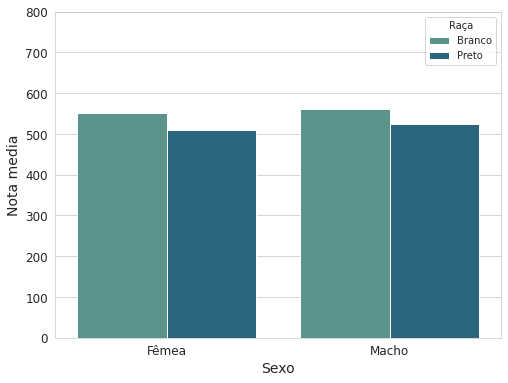

In [93]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Sexo',y='Nota media' ,data= df,hue = 'Raça',palette = 'crest',ci=None)
plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Nota media', fontsize = 14)
plt.ylim(0,800)
plt.show()

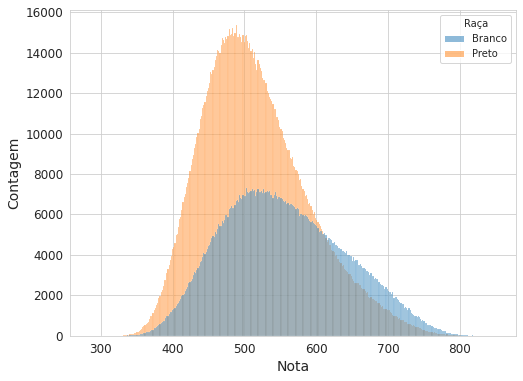

In [94]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.histplot(x='Nota media' ,data= df,hue = 'Raça')
plt.xlabel('Nota', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)

plt.show()

* esse plot explica porque na media as pessoas brancas tendem a ter um desepenho melhor do que as pessoas pretas. 

  * Isso se deve pelo fato que existe um número maior de pessoas brancas que tiraram notas acima de 600 pontos do que pessoas pretas. Abaixo desse valor o número de pessoas pretas é muito maior do que de brancos. 



* Númericamente qual é a difenreça  entre os  dados ?

In [95]:
print('Diferença entre as mulheres de raças difentes           :',
      df['Nota media'][(df['Sexo'] == 'Fêmea') & (df['Raça'] == 'Branco')].mean() - df['Nota media'][(df['Sexo'] == 'Fêmea') & (df['Raça'] == 'Preto')].mean())

print('Diferença entre os homens de raças difentes             :',
      df['Nota media'][(df['Sexo'] == 'Macho') & (df['Raça'] == 'Branco')].mean() - df['Nota media'][(df['Sexo'] == 'Macho') & (df['Raça'] == 'Preto')].mean())




print('Diferença entre os homens e mulhres  de raça branca     :',
      df['Nota media'][(df['Sexo'] == 'Macho') & (df['Raça'] == 'Branco')].mean() - df['Nota media'][(df['Sexo'] == 'Fêmea') & (df['Raça'] == 'Branco')].mean())


print('Diferença entre os homens e mulhres  de raça preta      :',
      df['Nota media'][(df['Sexo'] == 'Macho') & (df['Raça'] == 'Preto')].mean() - df['Nota media'][(df['Sexo'] == 'Fêmea') & (df['Raça'] == 'Preto')].mean())


Diferença entre as mulheres de raças difentes           : 41.06545941476412
Diferença entre os homens de raças difentes             : 37.838980364793315
Diferença entre os homens e mulhres  de raça branca     : 10.487556245066799
Diferença entre os homens e mulhres  de raça preta      : 13.714035295037604


### <a name="secao_4.2"> 4.2  Essa diferença entre as notas dos homens e mulheres é causada por qual prova ?  </a>.

In [96]:
col = ['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [115]:
print('Erro padrão:')
print('Macho branco:',np.std(df['NU_NOTA_CH'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho'))))
print('Macho preto:',np.std(df['NU_NOTA_CH'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho'))))

print('Fêmea branco:',np.std(df['NU_NOTA_CH'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea'))))
print('Fêmea preto:',np.std(df['NU_NOTA_CH'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea'))))

Erro padrão:
Macho branco: 0.12624854969966423
Macho preto: 0.09773514359129513
Fêmea branco: 0.10453740171076985
Fêmea preto: 0.07568166979988404


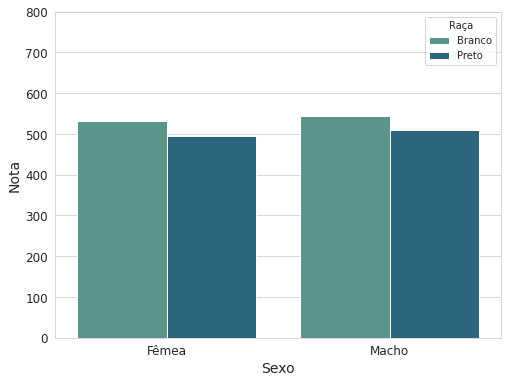

In [40]:
# Ciências Humanas
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Sexo',y='NU_NOTA_CH' ,data= df,hue = 'Raça',palette = 'crest',ci=None)

plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

In [116]:
print('Erro padrão:')
print('Macho branco:',np.std(df['NU_NOTA_CN'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho'))))
print('Macho preto:',np.std(df['NU_NOTA_CN'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho'))))

print('Fêmea branco:',np.std(df['NU_NOTA_CN'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea'))))
print('Fêmea preto:',np.std(df['NU_NOTA_CN'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea'))))

Erro padrão:
Macho branco: 0.1251258775686012
Macho preto: 0.0905549916270977
Fêmea branco: 0.10497401078350678
Fêmea preto: 0.07001823021019883


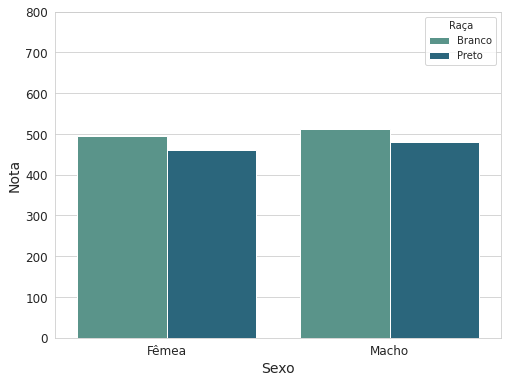

In [41]:
#Ciências da Natureza
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Sexo',y='NU_NOTA_CN' ,data= df,hue = 'Raça',palette = 'crest',ci=None)

plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

In [117]:
print('Erro padrão:')
print('Macho branco:',np.std(df['NU_NOTA_LC'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho'))))
print('Macho preto:',np.std(df['NU_NOTA_LC'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho'))))

print('Fêmea branco:',np.std(df['NU_NOTA_LC'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea'))))
print('Fêmea preto:',np.std(df['NU_NOTA_LC'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea'))))

Erro padrão:
Macho branco: 0.09340261925610069
Macho preto: 0.07658600969107762
Fêmea branco: 0.07645563241588842
Fêmea preto: 0.059026655073963756


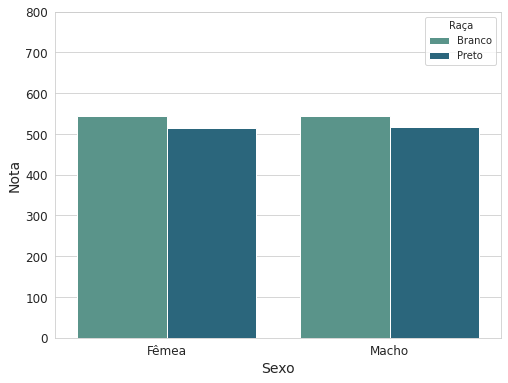

In [42]:
#Linguagens e Códigos
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Sexo',y='NU_NOTA_LC' ,data= df,hue = 'Raça',palette = 'crest',ci=None)

plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

In [118]:
print('Erro padrão:')
print('Macho branco:',np.std(df['NU_NOTA_MT'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho'))))
print('Macho preto:',np.std(df['NU_NOTA_MT'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho'))))

print('Fêmea branco:',np.std(df['NU_NOTA_MT'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea'))))
print('Fêmea preto:',np.std(df['NU_NOTA_MT'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea'))))

Erro padrão:
Macho branco: 0.18853731152904352
Macho preto: 0.13238594100628057
Fêmea branco: 0.15009739245794124
Fêmea preto: 0.09311593366451036


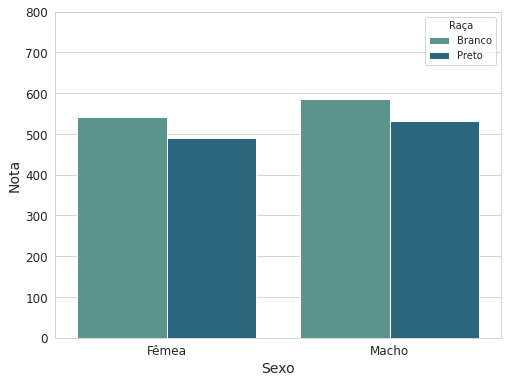

In [43]:
#Matemática
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Sexo',y='NU_NOTA_MT' ,data= df,hue = 'Raça',palette = 'crest',ci=None)

plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

In [120]:
print('Erro padrão:')
print('Macho branco:',np.std(df['NU_NOTA_REDACAO'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Macho'))))
print('Macho preto:',np.std(df['NU_NOTA_REDACAO'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Macho'))))

print('Fêmea branco:',np.std(df['NU_NOTA_REDACAO'][(df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['Sexo'] == 'Fêmea'))))
print('Fêmea preto:',np.std(df['NU_NOTA_REDACAO'][(df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['Sexo'] == 'Fêmea'))))

Erro padrão:
Macho branco: 0.2446048239829954
Macho preto: 0.18460622434897697
Fêmea branco: 0.21576516351148686
Fêmea preto: 0.15472400173210865


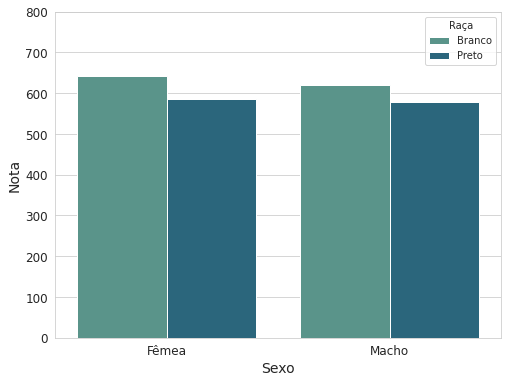

In [44]:
#Redação
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Sexo',y='NU_NOTA_REDACAO' ,data= df,hue = 'Raça',palette = 'crest',ci=None)

plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

* O principal fator que causa a diferença entre as notas dos alunos entre os homens e mulheres se dá por causa das provas de matemática e ciências da natureza. Este fator pode ser explicado pelo fato da desigualdade de gênero existente nos cursos de exatas onde a maioria é predominante homem.

* Também existem fatores ligados à criação, por exemplo meninos quando são mais novos brincam com brincadeiras que forçam desenvolver raciocínio lógico enquanto as meninas brincam coisas relacionadas ao cuidar de algo. Isso faz com que elas desenvolvam melhor habilidades de comunicação e expressão do que os dos homens, esse fator é um dos indícios que explica o porque as mulheres tiram notas melhores na redação do que os homens.
 

* Refêrencias para conclusão:     
    * https://www.virandobixo.com.br/noticias/NOT,0,0,1589938,mulheres+predominam+no+enem+mas+tem+nota+menor+que+homens.aspx

    * https://querobolsa.com.br/revista/homens-possuem-mais-facilidade-na-area-de-exatas-do-que-mulheres-informa-pesquisa

* Para ter uma visão melhor do desempenho dos alunos de sexos diferentes e raças diferentes,será plotado uma medida que mede o seguinte exemplo:
* Do total de alunos que são mulheres e brancas, quantas delas tiraram uma nota entre 900 a 100.
 * Lembrando que essas medidas seram feitas para todas variações de sexo e raça e o intevalo da nota será avaliado de 0 - 100, 100 - 200, 200 - 300 ...., 800 - 900, 900 - 1000.



### <a name="secao_4.3"> 4.3  Como esta distribuido a porcentagem de alunos de raças se sexos diferentes  ?  </a>.

In [45]:
# para facilitar os calculos seram criado mais duas variáveis
ind = np.zeros(df.shape[0])

ind[df['Nota media'] < 100]  = 0 

ind[(df['Nota media'] >= 100) & (df['Nota media'] < 200)] = 1 
ind[(df['Nota media'] >= 200) & (df['Nota media'] < 300)] = 2
ind[(df['Nota media'] >= 300) & (df['Nota media'] < 400)] = 3
ind[(df['Nota media'] >= 400) & (df['Nota media'] < 500)] = 4
ind[(df['Nota media'] >= 500) & (df['Nota media'] < 600)] = 5
ind[(df['Nota media'] >= 600) & (df['Nota media'] < 700)] = 6
ind[(df['Nota media'] >= 700) & (df['Nota media'] < 800)] = 7
ind[(df['Nota media'] >= 800) & (df['Nota media'] < 900)] = 8
ind[(df['Nota media'] >= 900) & (df['Nota media'] <= 1000)] = 9 

df['Intervalo_de_notas'] = ind

In [46]:
ind = np.zeros(df.shape[0])

ind[(df['Sexo'] == 'Fêmea') & (df['Raça'] == 'Preto')] = 0   # Mulheres  negras
ind[(df['Sexo'] == 'Fêmea') & (df['Raça'] == 'Branco')] = 1   # Mulheres  brancas
ind[(df['Sexo'] == 'Macho') & (df['Raça'] == 'Preto')] = 2   # Homens    negras
ind[(df['Sexo'] == 'Macho') & (df['Raça'] == 'Branco')] = 3   # Homens    brancos

df['Sexo/Raça'] = ind

In [47]:
cont_mulher_preta = []
cont_mulher_branca = []
cont_homen_preto = []
cont_homen_branco = []

for i in np.arange(1,10):
  cont_mulher_preta.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 0))
  cont_mulher_branca.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 1))
  cont_homen_preto.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 2))
  cont_homen_branco.append(np.sum(df['Sexo/Raça'][df['Intervalo_de_notas'] == i] == 3))

In [48]:
cont_mulher_preta   = cont_mulher_preta/np.sum(df['Sexo/Raça'] == 0)
cont_mulher_branca  = cont_mulher_branca/np.sum(df['Sexo/Raça'] == 1)
cont_homen_preto    = cont_homen_preto/np.sum(df['Sexo/Raça'] == 2)
cont_homen_branco   = cont_homen_branco/np.sum(df['Sexo/Raça'] == 3)


In [49]:
x_label= ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000']

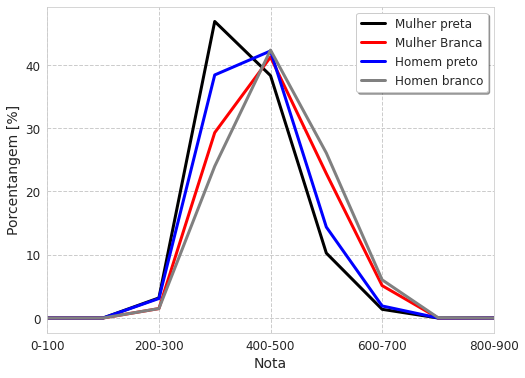

In [50]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
plt.plot(cont_mulher_preta*100,label = 'Mulher preta',color = 'black',linewidth = 3)
plt.plot(cont_mulher_branca*100, label = 'Mulher Branca',color = 'red',linewidth = 3)
plt.plot(cont_homen_preto*100, label = 'Homem preto',color = 'blue',linewidth = 3)
plt.plot(cont_homen_branco*100, label = 'Homen branco',color = 'gray',linewidth = 3)

plt.xlim(0,8)
inter = np.arange(0,9,2)

x_lab= [x_label[0],x_label[2],x_label[4],x_label[6],x_label[8]]

ax = plt.gca()
ax.set_xticks(inter)
ax.set_xticklabels(x_lab)
plt.grid(linestyle='--', linewidth=1)

plt.legend(shadow=True, fontsize=12)
plt.ylabel('Porcentangem [%]',fontsize = 14)
plt.xlabel('Nota',fontsize = 14)
#plt.title('Porcentagem de alunos de alunos',fontsize = 18)
plt.show()

### <a name="secao_4.4"> 4.4  O tipo de escola que a pessoa estudo afeta o seu desempenho ?  </a>.


 
* Observação: As escolas serão avaliadas pelos tipos das suas dependências administrativas, pois são elas que determinam os seus investimentos.


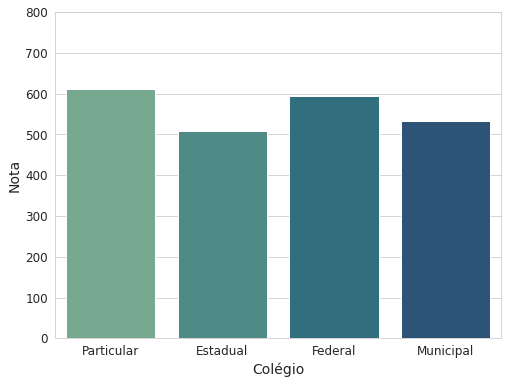

In [51]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'TP_DEPENDENCIA_ADM_ESC',y='Nota media' ,data= df,palette = 'crest',ci=None)

plt.xlabel('Colégio', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

In [52]:
print("Qual é a diferença da nota das escolas particulares em relação às demais:")
print('Municipal :',np.mean(df['Nota media'][df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular']) - np.mean(df['Nota media'][df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal']))
print('Estadual  :',np.mean(df['Nota media'][df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular']) - np.mean(df['Nota media'][df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual']))
print('Federal   :',np.mean(df['Nota media'][df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular']) - np.mean(df['Nota media'][df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal']))

Qual é a diferença da nota das escolas particulares em relação às demais:
Municipal : 79.76675777641469
Estadual  : 103.8389714927394
Federal   : 17.179942434894542


* Claramente pelos resultados mostrados as escolas particulares apresentaram um maior desempenho dos demais. Porque elas tendem a ter um investimento em infraestrutura. Estudos apontados nas referências abaixo mostram que elas tendem a ter um maior desempenho.


* refêrencias: 

      * https://www.melhorescola.com.br/artigos/escola-publica-ou-escola-particular-entenda-a-diferenca-entre-os-dois-sistemas-de-ensino

      * https://familia.rededecisao.com.br/a-importancia-da-estrutura-fisica-da-escola/

      * https://escolasexponenciais.com.br/tendencias-e-metricas/qual-a-influencia-da-infraestrutura-escolar-no-aprendizado/

* Conforme foi visto, a infraestrutura interfere diretamente no desempenho dos alunos. Logo, será que alunos com a mesma infraestrutura mas com raças diferentes possuem o mesmo desempenho?

In [126]:
print('Erro padrão:')
print('Federal')
print('branco:',np.std(df['Nota media'][(df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular'))))
print('preto:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular'))))

print('Muncipal')
print('branco:',np.std(df['Nota media'][(df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal'))))
print('preto:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal'))))

print('Estadual')
print('branco:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual'))))
print('preto:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual'))))

print('Federal')
print('branco:',np.std(df['Nota media'][(df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal')])/np.sqrt(np.sum((df['Raça'] == 'Branco') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal'))))
print('preto:',np.std(df['Nota media'][(df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal')])/np.sqrt(np.sum((df['Raça'] == 'Preto') & (df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal'))))

Erro padrão:
Federal
branco: 0.247270833945445
preto: 0.35558298212143297
Muncipal
branco: 0.1279770700896047
preto: 0.12066846008726892
Estadual
branco: 0.014224099080722741
preto: 0.010731978116817
Federal
branco: 0.05040266580536203
preto: 0.045763552825873716


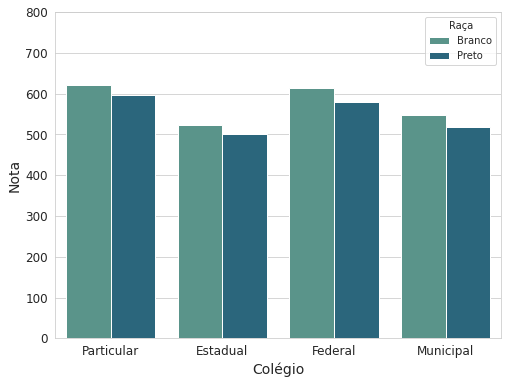

In [53]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'TP_DEPENDENCIA_ADM_ESC',y='Nota media',hue ='Raça' ,data= df,palette = 'crest',ci=None)

plt.xlabel('Colégio', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

In [84]:
print("Qual é a diferença da nota das escolas particulares em relação às demais:")
print('Particular:',np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular') & (df['Raça'] == 'Branco')]) - np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Particular') & (df['Raça'] == 'Preto')]))

print('Estadual:',np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual') & (df['Raça'] == 'Branco')]) - np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Estadual') & (df['Raça'] == 'Preto')]))

print('Municipal:',np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal') & (df['Raça'] == 'Branco')]) - np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Municipal') & (df['Raça'] == 'Preto')]))

print('Federal:',np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal') & (df['Raça'] == 'Branco')]) - np.mean(df['Nota media'][(df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal') & (df['Raça'] == 'Preto')]))

Qual é a diferença da nota das escolas particulares em relação às demais:
Particular: 25.16689227517361
Estadual: 22.90148367896029
Municipal: 30.092954566510457
Federal: 34.43800195168865


In [85]:
# O erro padrão dessas medidas não seram caclulados devido que o erro padrão individual foi muito menor do que 1 ponto, 
#logo o erro padrão dessas medidas não sera menor do que 1 ponto

* Claramente mostra que mesmo com que alunos de raças diferentes tenham a mesma estrutura os alunos da raça preta apresentam um desempenho pior.


* Os resultados mostram que com alunos de mesma raça quando tem acesso a colégios de maior infraestrutura a sua nota evolui. Mas um ponto que vale destacar é que a diferença entre os alunos de raças diferentes não diminui quando o setor administrativo da escola muda. Isso evidencia que o desepenho pior dos alunos de raça preta em relação aos brancos não está interligado apenas com os colégios de setores administrativos diferentes, mas possivelmente a fatores sociais e econômicos. Por esse motivo agora será analisado o desempenho dos alunos segundo a renda das suas famílias.

In [86]:
df[df['Raça'] == 'Preto'].groupby('TP_DEPENDENCIA_ADM_ESC')['Nota media'].std()

TP_DEPENDENCIA_ADM_ESC
Estadual      64.966861
Federal       70.359881
Municipal     71.439400
Particular    78.565334
Name: Nota media, dtype: float64

In [62]:
#df[df['Raça'] == 'Preto']['TP_DEPENDENCIA_ADM_ESC'].value_counts()

In [58]:
df[df['Raça'] == 'Branco'].groupby('TP_DEPENDENCIA_ADM_ESC')['Nota media'].std()

TP_DEPENDENCIA_ADM_ESC
Estadual      67.221677
Federal       66.754521
Municipal     70.468785
Particular    74.515549
Name: Nota media, dtype: float64

### <a name="secao_4.5"> 4.5  Quanto maior a renda, maior o desempenho dos alunos? </a>.

In [87]:
def valores_plot(df,c,coluna): 
  valore_preto = df[(df['Raça'] == 'Preto')].groupby(coluna)[c].mean()
  valores_branco   = df[(df['Raça'] == 'Branco')].groupby(coluna)[c].mean()

  valores_preto_std = df[(df['Raça'] == 'Preto')].groupby(coluna)[c].std().values
  valores_branco_std   = df[(df['Raça'] == 'Branco')].groupby(coluna)[c].std().values

  print("Erro da medida") 
  print(valores_preto_std/df[(df['Raça'] == 'Preto')].groupby(coluna)[c].count())

  # intervalo de confiança
  print(valores_branco_std/df[(df['Raça'] == 'Branco')].groupby(coluna)[c].count())

  valores_preto_erro = valores_preto_std/df[(df['Raça'] == 'Preto')].groupby(coluna)[c].count()
  valores_branco_erro = valores_preto_std/df[(df['Raça'] == 'Branco')].groupby(coluna)[c].count()

  return valore_preto,valores_branco,valores_preto_std,valores_branco_std

In [88]:
valores_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,'Nota media','Renda')

Erro da medida
Renda
0.5     0.000119
1.2     0.000134
1.7     0.000415
2.2     0.000455
2.7     0.001146
3.5     0.000857
4.5     0.001628
5.5     0.002282
6.5     0.004528
7.5     0.006403
8.5     0.009247
9.5     0.009983
11.0    0.007831
13.5    0.010326
17.5    0.015014
20.0    0.015034
Name: Nota media, dtype: float64
Renda
0.5     0.000482
1.2     0.000330
1.7     0.000671
2.2     0.000643
2.7     0.001225
3.5     0.000857
4.5     0.001277
5.5     0.001614
6.5     0.002808
7.5     0.003750
8.5     0.004829
9.5     0.004860
11.0    0.003277
13.5    0.003852
17.5    0.004328
20.0    0.003237
Name: Nota media, dtype: float64


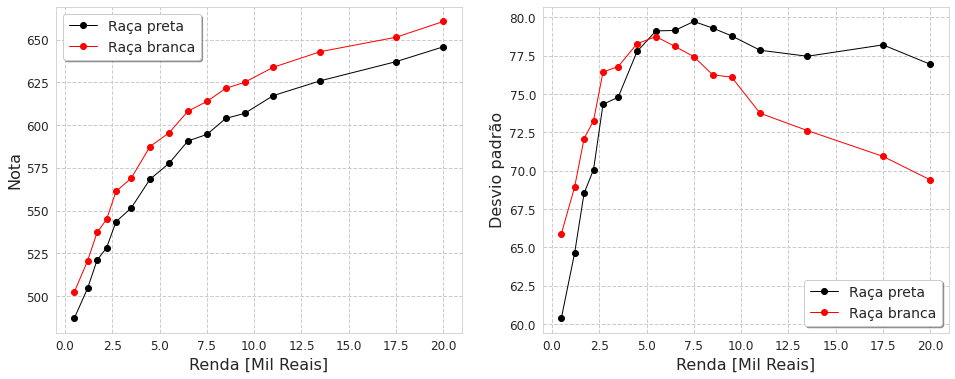

In [89]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(np.unique(df['Renda']),valores_preto,'o-',label = 'Raça preta',color = 'black',linewidth = 1)
plt.plot(np.unique(df['Renda']),valores_branco,'o-',label = 'Raça branca',color = 'red',linewidth = 1)



inter = np.unique(df['Renda'])


plt.grid(linestyle='--', linewidth=1)

plt.legend(shadow=True, fontsize=14)
plt.ylabel('Nota',fontsize = 16)
plt.xlabel('Renda [Mil Reais]',fontsize = 16)

plt.subplot(1,2,2)
plt.plot(np.unique(df['Renda']),valores_preto_std,'o-',label = 'Raça preta',color = 'black',linewidth = 1)
plt.plot(np.unique(df['Renda']),valores_branco_std,'o-',label = 'Raça branca',color = 'red',linewidth = 1)



inter = np.unique(df['Renda'])


plt.grid(linestyle='--', linewidth=1)

plt.legend(shadow=True, fontsize=14)
plt.ylabel('Desvio padrão',fontsize = 16)
plt.xlabel('Renda [Mil Reais]',fontsize = 16)
plt.legend(shadow=True, fontsize=14)

plt.show()

* Claramente o resultado mostrou evidência o fato que quanto maior a renda da família o aluno tende a tirar uma nota melhor.
 
* O resultado mostrado  é possível tirar conclusões interessantes. Sendo que uma delas é que o fator econômico influencia a nota dos alunos independentemente da sua raça. Mas os alunos de raça preta na média nunca apresentou uma nota melhor do que as nota média dos alunos de raça branca. 
 
* Um ponto que pode se destacar é que esse resultado evidencia que mesmo que os alunos de raças diferentes tenham a mesma estrutura, a renda é um fator que influencia nos resultados.

### <a name="secao_4.6"> 4.6  Escolaridade dos pais interfere na nota dos alunos?</a>.

In [127]:
valores_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df,'Nota media','Escolaridade da mãe')

Erro da medida
Escolaridade da mãe
1    0.000800
2    0.000196
3    0.000272
4    0.000294
5    0.000134
6    0.000620
7    0.000934
Name: Nota media, dtype: float64
Escolaridade da mãe
1    0.003517
2    0.000577
3    0.000610
4    0.000597
5    0.000225
6    0.000551
7    0.000699
Name: Nota media, dtype: float64


In [90]:
np.unique(df['Escolaridade da mãe'])

array([1, 2, 3, 4, 5, 6, 7])

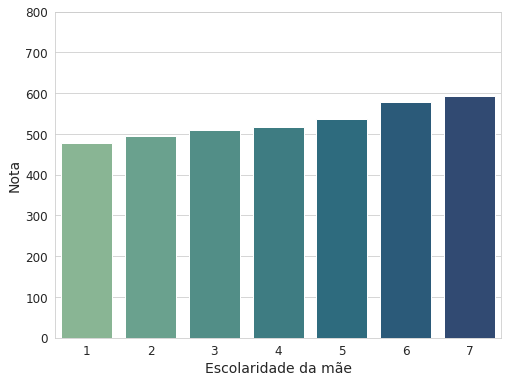

In [91]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Escolaridade da mãe',y='Nota media' ,data= df,palette = 'crest',ci=None)

plt.xlabel('Escolaridade da mãe', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

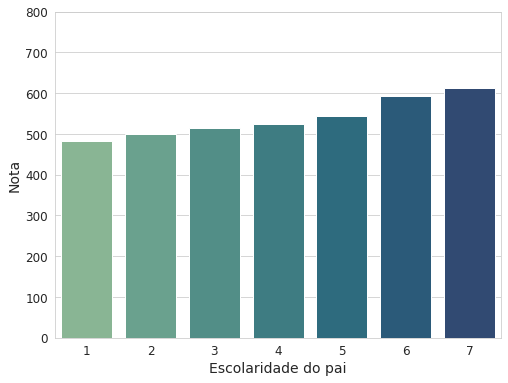

In [92]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Escolaridade do pai',y='Nota media' ,data= df,palette = 'crest',ci=None)

plt.xlabel('Escolaridade do pai', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)

plt.ylim(0,800)
plt.show()

* Os resultados exibidos mostram que claramente a família que o pai ou a mãe que tem no mínimo uma graduação recebe uma nota melhor.

### <a name="secao_4.7"> 4.7  O acesso a internet e ao um computador influência nos estudos ?</a>.

* Claramente nos resutados anterires foi visto que a renda inflência no desepenho dos alunos. Uma analise que foi mostrada é de que quanto maior a renda maior menor chance da pessoa de não ter acesso ao computador com internert. 

* relembrando o resultado.



Text(0, 0.5, 'Contagem')

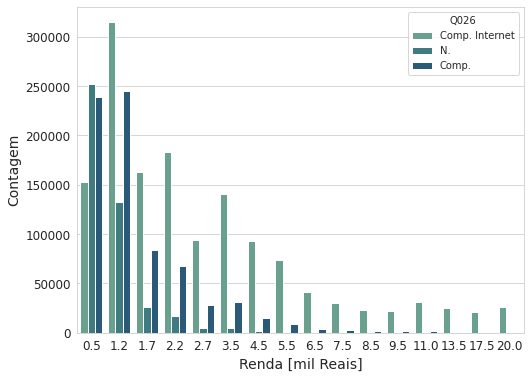

In [ ]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Renda' ,data= df,hue = 'Q026',palette = 'crest')

plt.xlabel('Renda [mil Reais]', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)

* A relação mostrada afirma a hipótese levantada. E através dessa informação é visto que o número de usuários que não tem acesso a internet e ao um computador diminui drasticamente a partir da renda de  3.5 mil reais.
 
* Por esse motivo só será visto o quanto interfere se uma pessoa tem acesso a um computador com internet até as pessoas com renda de 2245 mil reais.

In [128]:
valores_preto,valores_branco,valores_preto_std,valores_branco_std = valores_plot(df[df['Renda']<3.5],'Nota media','Q026')

Erro da medida
Q026
Comp.             0.000129
Comp. Internet    0.000129
N.                0.000166
Name: Nota media, dtype: float64
Q026
Comp.             0.000357
Comp. Internet    0.000205
N.                0.000740
Name: Nota media, dtype: float64


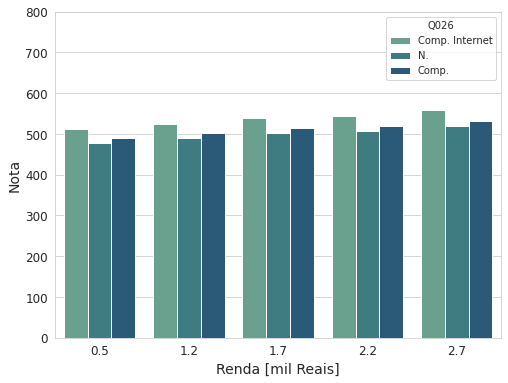

In [ ]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Renda',y='Nota media' ,data= df[df['Renda']<3.5],hue = 'Q026',palette = 'crest',ci=None)

plt.xlabel('Renda [mil Reais]', fontsize = 14)
plt.ylabel('Nota', fontsize = 14)
plt.ylim(0,800)
plt.show()

### <a name="secao_5"> 5  Conclusão.</a>.

* Os resultados mostram que mesmo quando as pessoas pretas possuem condições financeiras iguais ou semelhantes comparando com pessoas brancas, o racismo continua sendo um fator que afeta o rendimento e aproveitamento escolar, em vista que serão mais suscetíveis a ataques de ódio , discriminação, exclusão e tortura psicológicas. Um outro fator que foi evidenciado no trabalho é que quanto é a melhor estrutura para as pessoas o seu desempenho tende a ser melhor, visto que os alunos que têm acesso a colégios com estrutura melhores, acesso a internet tendem a ter um desempenho melhor. 

* Um outro fato que é evidenciado neste trabalho é que quando os pais possuem um nível de estudo elevado, eles consequentemente entendem e percebem na prática e ao longo de suas vidas, o quanto isso é importante para o futuro. Seja na estabilidade financeira, ter um emprego mais confortável ou até mesmo na hora de conquistar cargos de destaque. Isso faz com que incentivem seus filhos a seguirem pelo mesmo caminho, em vista que visam pela felicidade, sucesso e amadurecimento dos mesmos.

* Um próximo passo que pode ser aplicado neste trabalho, é a aplicação de um algoritmo de machine learning que usa como dados de Target a nota média dos alunos e como variáveis independentes as variáveis sociais e econômicas  utilizadas neste trabalho. Isso será feito para medir  o quanto esses fatores conseguem explicar a variabilidade da nota do candidato. Essa medida será feita através do $R^{2}$. Esse próximo passo já foi aplicado no artigo 'Impacto das variáveis socioeconômicas no desempenho do Enem: uma análise espacial e sociológica' , no qual ele apresenta um estudo sobre a  influência dos  fatores sociais e econômicos na nota média do Enem em qualquer município.  
